In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings



from scipy.stats import chi2
from scipy.stats import chi2_contingency
from datetime import datetime

# Archivos biblioteca Team 45

from classes_and_abc import *    # Función que recibe los datos de pedidos y la tabla de categorias y devuelve el df fusionado
from crear_columna_lealtad_tienda import *  # Función para agregar columna lealtad del vendedor y antiguedad recibe del DF
from colfechas_antiguedad import * # Funcion para convertir a fechas los campos de fecha y agregar antiguedad y clasificar las antiguedades por segmentos



warnings.filterwarnings("ignore")  # Suppress all warnings

In [7]:
df_orig = pd.read_csv('data/teate final v2.csv')
df_cat_orig = pd.read_excel('data/Teate Categorias.xlsx')

In [18]:
df = df_orig.copy()
df_cat = df_cat_orig.copy()

In [19]:
df['Lealtad'] = crear_col_lealtad_tienda(df) 

# creo columna lealtad: 
# Lealtad baja: menos de 2 ordenes mensual 
# Lealtad media entre 2 y 4 ordenes promedio mensual
# Lealtad alta: Maas de 4 ordenes promedio mensual

In [20]:
df = classes_abc(df, df_cat)

#Creo columnas asociadad a la categoria: 'NOMBRE SUB', 'NOMBRE CAT','Categoria Logistica', 'Rent Rotacion'

In [21]:
df = colfechas_antiguedad(df) 

# Convierto a formatode fecha
# Calculo la antiguedad de una tienda en dias 'Antiguedad Tienda' 
# Calculo el segmento 1: menor a un año, 2: entre 1 y 2 años y 3: Mayor a 3 años de antiguedad 'Segmento Antiguedad'

Text(0.5, 1.0, 'Mobile APP behavior: Order Reg. Hour Distribution')

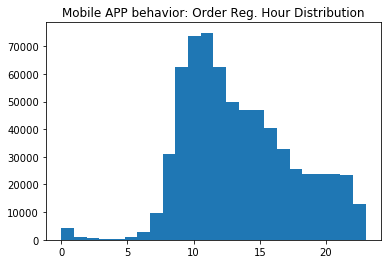

In [37]:
plt.hist(df['HoraMovil'], bins=24);
plt.title('Mobile APP behavior: Order Reg. Hour Distribution')

Text(0.5, 1.0, 'Users Seniority Distribution in days')

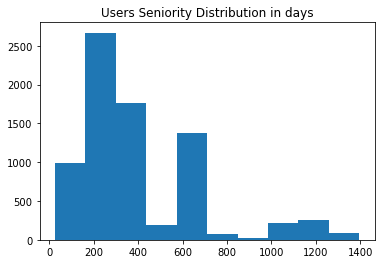

In [36]:
df_temp=df[['Antiguedad Tienda','Nombre Tienda']].groupby('Nombre Tienda', as_index=False).agg({'Antiguedad Tienda':'max'})
plt.hist(df_temp['Antiguedad Tienda']);
plt.title("Users Seniority Distribution in days")

In [25]:
df_temp = df[['Segmento Antiguedad', 'Tienda']].groupby(['Segmento Antiguedad'], as_index=False).count()
df_temp['Porcentaje']= df_temp['Tienda']/sum(df_temp['Tienda'])
df_temp.sort_values(by='Tienda', ascending=False)

,Segmento Antiguedad,Tienda,Porcentaje
1,2,350431,0.519479
0,1,228959,0.339409
2,3,95191,0.141111


In [26]:
df_temp = df[['Lealtad', 'Tienda']].groupby(['Lealtad'], as_index=False).count()
df_temp['Porcentaje']= df_temp['Tienda']/sum(df_temp['Tienda'])
df_temp.sort_values(by='Tienda', ascending=False)

,Lealtad,Tienda,Porcentaje
1,Lealtad baja,5625,0.562781
2,Lealtad media,3330,0.333167
0,Lealtad alta,1040,0.104052


In [35]:
#df_temp = df[['Lealtad', 'Tienda']].groupby(['Lealtad'], as_index=False).count().plot(kind='pie' column='Tienda')

SyntaxError: invalid syntax (<ipython-input-35-533fd55069fb>, line 1)

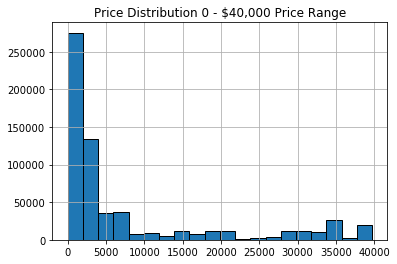

In [50]:
plt.title('Price Distribution 0 - $40,000 Price Range')
plt.hist(df[df['Valor Unitario Factura']<40000]['Valor Unitario Factura'], bins=20, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

In [51]:
df['Nombre Material']

0          Florhuila Arroba 25 unid. x 500 g
1          Florhuila Arroba 25 unid. x 500 g
2          Florhuila Arroba 25 unid. x 500 g
3          Florhuila Arroba 25 unid. x 500 g
4          Florhuila Arroba 25 unid. x 500 g
                         ...                
674576           Jumbo Bites disp x6uds x40g
674577      Jet Crema disp x 12 sticks x 18g
674578    Choctina Jumbo Flow dispx12udsx48g
674579         Tallarin Doria Clasica x 500g
674580         Tallarin Doria Clasica x 500g
Name: Nombre Material, Length: 674581, dtype: object

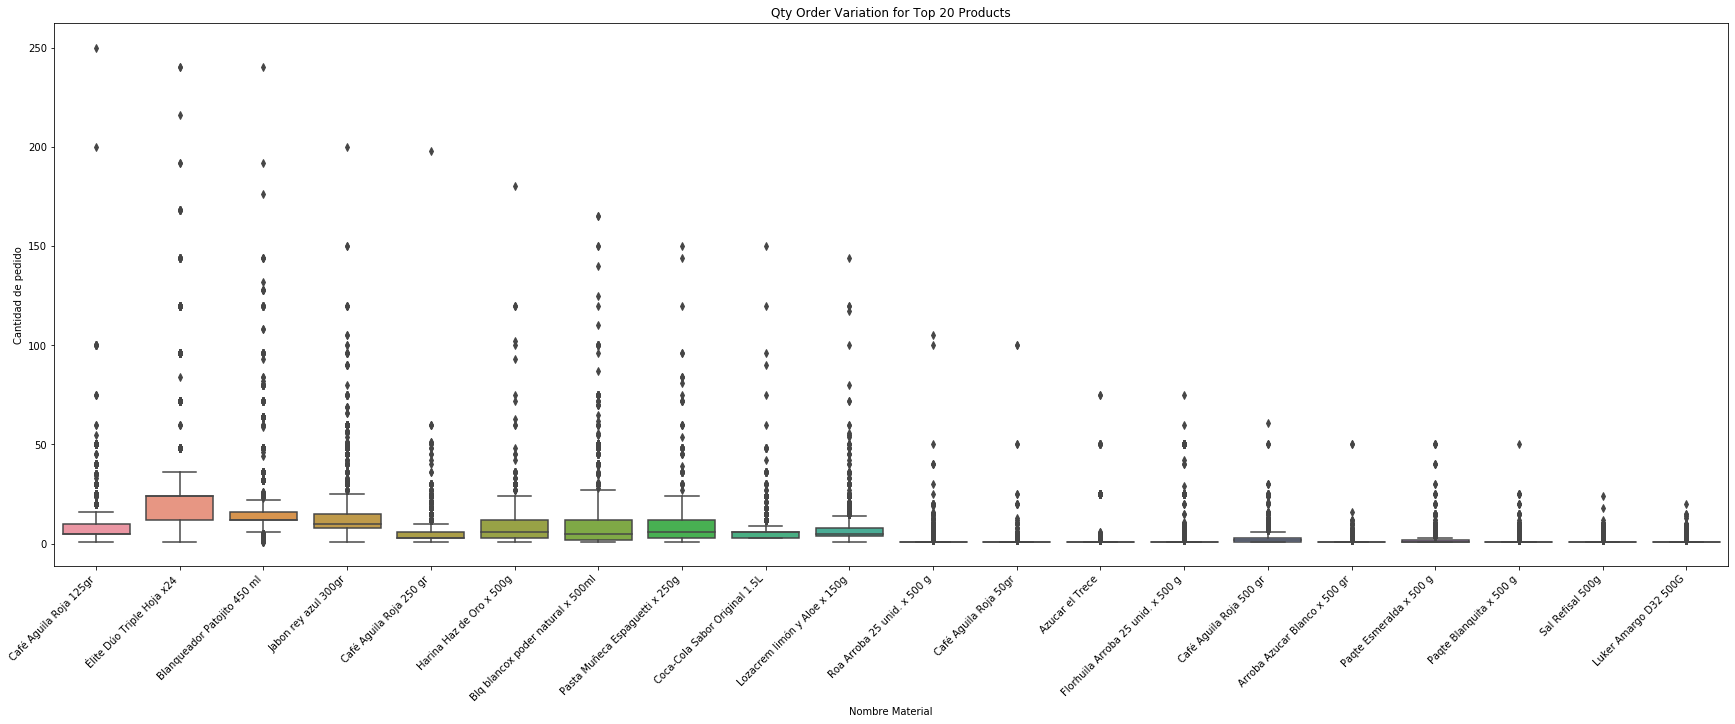

In [56]:
top_productos = df[['Nombre Material','Pedido']].groupby(['Nombre Material'], as_index=False).agg({'Pedido':'count'})
top20_list = top_productos.sort_values(by='Pedido', ascending=False)['Nombre Material'].head(20)

top_products_to_price_boxplot = df[df['Nombre Material'].isin(top20_list)][['Nombre Material', 'Cantidad de pedido']]
top_products_to_price_boxplot.sort_values(by='Cantidad de pedido', ascending=False, inplace=True)

fig = plt.figure(figsize=(30,10))
ax = fig.add_axes()
plt.xticks(rotation=45, ha='right')
plt.title('Qty Order Variation for Top 20 Products')
p1=sns.boxplot(ax=ax, x='Nombre Material', y='Cantidad de pedido', data=top_products_to_price_boxplot)


In [53]:
#Falta graficar esto que estába encapsulado en la funcion que se saco del main

#fig=plt.figure(figsize=(10,10)); 
#pedidos_tiendadf3.hist(column="Num promedio de pedidos mensuales", bins=60);


In [28]:
Col_categorias = [
 
 'Tienda', 'Nombre Tienda', 'Población', 'Dirección Tienda', 
 'Fecha Creación Tienda', 'Nombre ZonaComercial', 'Comuna', 'Barrio',
 'Region', 'Pedido', 'Fecha Pedido', 'Fabricante', 
 'Nombre Fabricante', 'Material', 'Nombre Material', 'UM', 
 'Denominación Motivo Rechazo', 'Cupón Dscto', 'Nombre Ruta','MES', 'Segmento Antiguedad', 'Lealtad', 
 'NOMBRE SUB', 'NOMBRE CAT','Categoria Logistica', 'Rent Rotacion']

# Se agregó una columna de segmento antiguedad se definió numerica para que fuese ordinal mas alto mas antiguo. 1,2,3
# Categorias, Subcategorias, Cuadrante_rentabilidad_rotacion, Tipificacion_logistica, Lealtad.


Col_numericas = [
    
    'Cantidad de pedido', 'Valor Unitario Pedido', 'Valor Total Pedido', 
    'Ctd.facturada', 'Valor Unitario Factura', 'Valor TotalFactura', 'Descuento Teaté', 
    'Valor Cupón Teaté','HoraMovil', 'Antiguedad Tienda']

Col_numericas_analisis = [
    
    'Cantidad de pedido', 'Valor Unitario Pedido', 'Valor Total Pedido', 'Descuento Teaté', 
    'Valor Cupón Teaté','HoraMovil', 'Antiguedad Tienda']

Col_categorias_analisis = [
 
    'Población', 'Denominación Motivo Rechazo', 'Segmento Antiguedad', 'Lealtad', 'NOMBRE SUB', 'NOMBRE CAT','Categoria Logistica', 'Rent Rotacion'
    'Barrio',
    'Comuna', 
    'Nombre Fabricante',   
    'Nombre ZonaComercial',  
    'Region',
    'Pedido', 
    'UM', 
    'Cupón Dscto', 
    'Nombre Ruta',
    'MES'
    ]


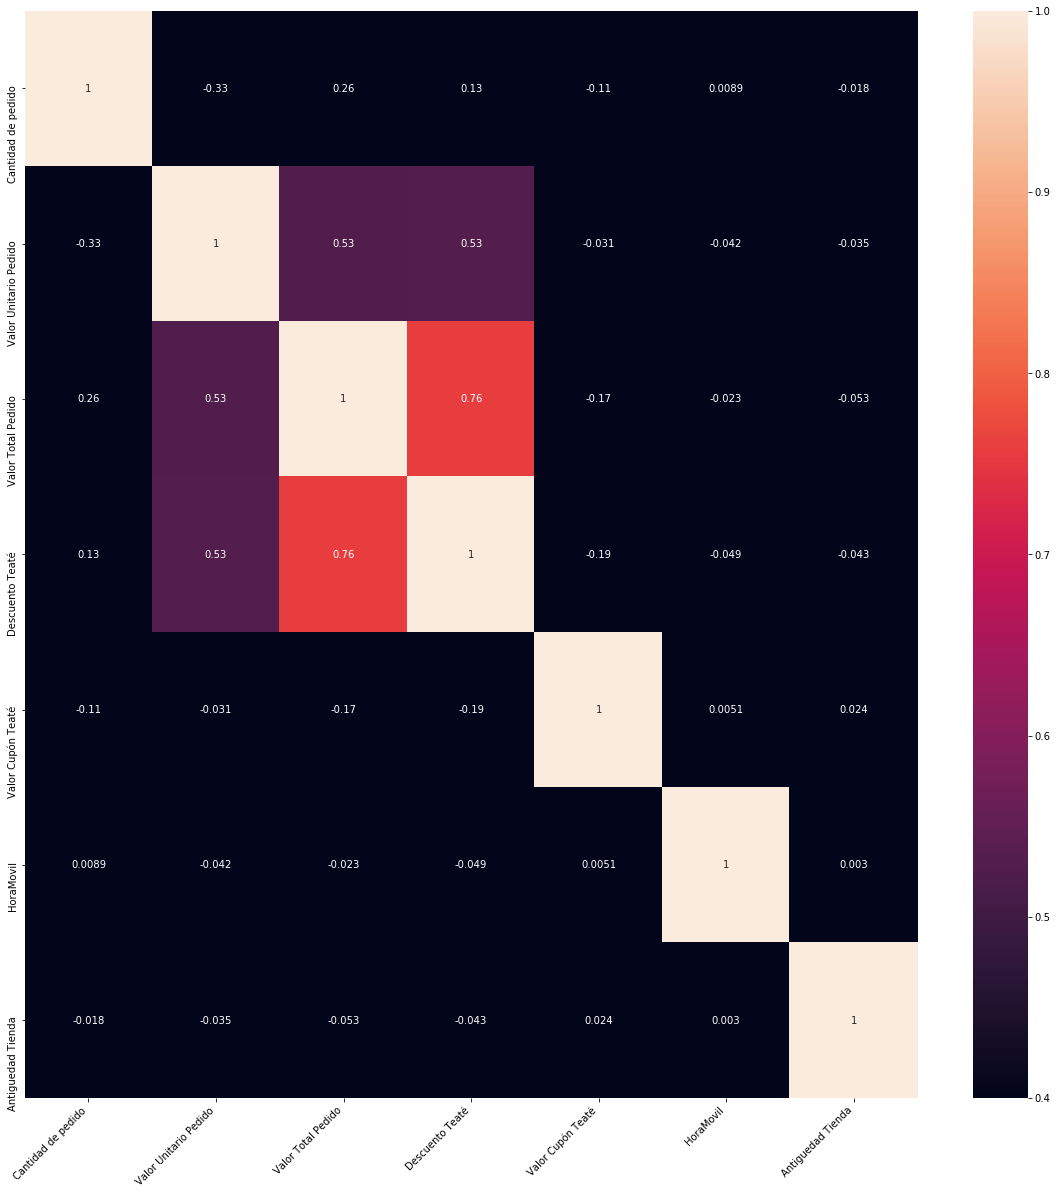

In [29]:
#Analisis de matriz de correlación variables numéricas usando heatmap

df_numeric = df[Col_numericas_analisis]

fig = plt.figure(figsize=(20,20))
ax = fig.add_axes()
plt.xticks(rotation=45, ha='right')
sns.heatmap(df_numeric.corr(), vmin=0.4, vmax=1, annot=True)


In [30]:
df_numeric.corr()

,Cantidad de pedido,Valor Unitario Pedido,Valor Total Pedido,Descuento Teaté,Valor Cupón Teaté,HoraMovil,Antiguedad Tienda
Cantidad de pedido,1.000000,-0.333008,0.258805,0.126918,-0.109832,0.008931,-0.018061
Valor Unitario Pedido,-0.333008,1.000000,0.525126,0.529394,-0.030749,-0.041815,-0.035190
Valor Total Pedido,0.258805,0.525126,1.000000,0.758096,-0.173512,-0.022600,-0.052614
Descuento Teaté,0.126918,0.529394,0.758096,1.000000,-0.194414,-0.048934,-0.042503
Valor Cupón Teaté,-0.109832,-0.030749,-0.173512,-0.194414,1.000000,0.005073,0.024298
HoraMovil,0.008931,-0.041815,-0.022600,-0.048934,0.005073,1.000000,0.002986
Antiguedad Tienda,-0.018061,-0.035190,-0.052614,-0.042503,0.024298,0.002986,1.000000


In [ ]:
df2 = pd.crosstab(df['Población'], df['Denominación Motivo Rechazo'])
df3 = pd.crosstab(df['Barrio'], df['Denominación Motivo Rechazo'])
df4 = pd.crosstab(df['MES'], df['Denominación Motivo Rechazo'])
df5 = pd.crosstab(df['Nombre Fabricante'], df['Denominación Motivo Rechazo'])
df6 = pd.crosstab(df['UM'], df['Denominación Motivo Rechazo'])
df7 =pd.crosstab(df['Region'], df['Denominación Motivo Rechazo'])

df8 = pd.crosstab(df['Población'], df['Segmento Antiguedad'])
df9 = pd.crosstab(df['Barrio'], df['Segmento Antiguedad'])
df10 = pd.crosstab(df['MES'], df['Segmento Antiguedad'])
df11 = pd.crosstab(df['Nombre Fabricante'], df['Segmento Antiguedad'])
df12 = pd.crosstab(df['UM'], df['Segmento Antiguedad'])
df13 =pd.crosstab(df['Region'], df['Segmento Antiguedad'])

df14 = pd.crosstab(df['Población'], df['Lealtad'])
df15 = pd.crosstab(df['Barrio'], df['Lealtad'])
df16 = pd.crosstab(df['MES'], df['Lealtad'])
df17 = pd.crosstab(df['Nombre Fabricante'], df['Lealtad'])
df18 = pd.crosstab(df['UM'], df['Lealtad'])
df19 =pd.crosstab(df['Region'], df['Lealtad'])

In [ ]:
#chi2_contingency(df2)

In [ ]:
g, p, dof, expctd = chi2_contingency(df11)

print('El valor del p-value es: ',p)

if p<0.05:
    print('Las variables son dependiente: Es decir si estan correlacionadas')
else:
    print('Las variables son independiente: Es decir no estan correlacionadas')